Please run every single code block from top to bottom, while waiting for each to complete before proceeding. Thank you.

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
# The dataset is taken from your drive. So you have to download the True.csv and Fake.csv and put it in some Drive folder and put the route here.
fake_news = 0
real_news = 0

with open("/content/drive/My Drive/Computing_Coursework_Dataset/Fake.csv", "r") as f: # Change the Google Drive route to your folder in Google Drive where the dataset is
  fake_news = pd.read_csv(f)

with open("/content/drive/My Drive/Computing_Coursework_Dataset/True.csv", "r") as f:
  real_news = pd.read_csv(f)

Mounted at /content/drive


# Data Visualisation

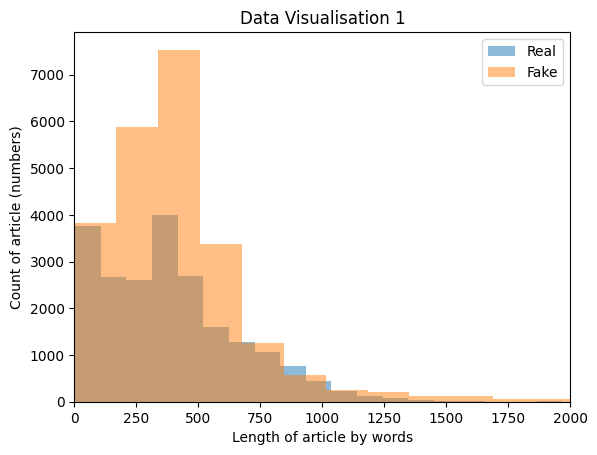

In [ ]:
# data visualisation 1
import matplotlib.pyplot as plt
import re

plt.clf()
def count_words(x):
    split_list = x.split(" ")
    res = len(split_list)
    return res

real_lengths = real_news["text"].apply(len)
fake_lengths = fake_news["text"].apply(len)

real_count = real_news["text"].apply(count_words)
fake_count = fake_news["text"].apply(count_words)

plt.hist(real_count, bins = 50, alpha = 0.5, label = "Real")
plt.hist(fake_count, bins = 50, alpha = 0.5, label = "Fake")
plt.xlim(0, 2000)
plt.title("Data Visualisation 1")
plt.xlabel("Length of article by words")
plt.ylabel("Count of article (numbers)")
plt.legend()
plt.show()

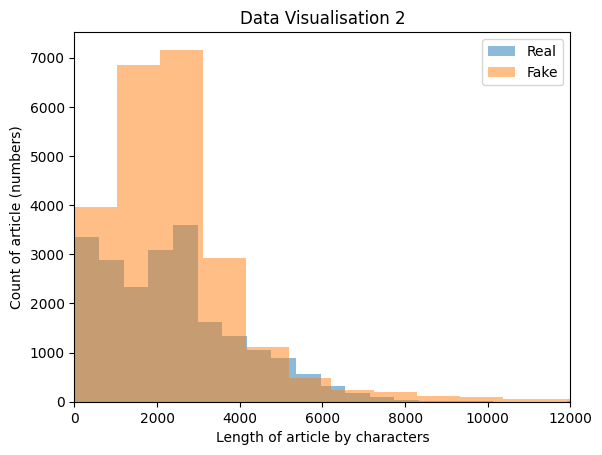

In [ ]:
# data visualisation 2
plt.hist(real_lengths, bins = 50, alpha = 0.5, label = "Real")
plt.hist(fake_lengths, bins = 50, alpha = 0.5, label = "Fake")
plt.xlim(0, 12000)
plt.title("Data Visualisation 2")
plt.xlabel("Length of article by characters")
plt.ylabel("Count of article (numbers)")
plt.legend()
plt.show()

In [ ]:
# data visualisation 3
import nltk

# Will take a while to run, be patient.

# Pre-processing the real news data
filtered_true = []
all_words = []

for text in real_news.to_string().split():
    all_words.extend(nltk.word_tokenize(text.lower()))
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_true = [word for word in all_words if word.isalpha() and word not in stop_words]


# Pre-processing the fake news data
filtered_fake = []
all_words = []

for text in fake_news.to_string().split():
    all_words.extend(nltk.word_tokenize(text.lower()))
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_fake = [word for word in all_words if word.isalpha() and word not in stop_words]


# counting the most common words in both real and fake news
combined_words = filtered_fake + filtered_true

countedWords = []
for i in set(combined_words):
    countedWords.append([combined_words.count(i), i])


# taking out 20 of the most frequent words
countedWords = sorted(countedWords, key=lambda a: a[0])[-20:]


# counting how many of the most common words are in the real and fake news
countedTrue = []
countedFalse = []

for i in countedWords:
    countedTrue.append([filtered_true.count(i[1]), i[1]])
    countedFalse.append([filtered_fake.count(i[1]), i[1]])


# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in countedTrue], [x[0] for x in countedTrue], alpha=0.5, label='Real')
plt.bar([x[1] for x in countedFalse],[x[0] for x in countedFalse], alpha=0.5, label='Fake')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Data visualisation 3: Word Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

# Data Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np

real_subset = real_news.loc[:5000]
fake_subset = fake_news.loc[:5000]

real = real_subset["text"].apply(preprocess_text)
fake = fake_subset["text"].apply(preprocess_text)

# Model Training/Evaluation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.sparse as sp
import numpy as np

# Getting the features
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real)
X_fake = vectorizer.transform(fake)

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42)

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)

  # Model evaluation
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 Score:', f1)

train_and_evaluate(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.9970014992503748
Precision: 0.9980139026812314
Recall: 0.9960356788899901
F1 Score: 0.9970238095238095


# Save the model (to temporary storage)

In [ ]:
# This is a VERY important step (subsequent cells require the model to be saved in Colab's temporary storage to work)

from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# Deployment

## Define *predict* function



In [ ]:
from joblib import load

def predict(text, clf, vectoriser):
  preprocessed_text = preprocess_text(text)
  X = vectoriser.transform([preprocessed_text])
  y_pred = clf.predict(X)
  if y_pred[0] == 1:
    result = 'real'
  else:
    result = 'fake'
  return result

## Let's start using the damn thing!

In [ ]:
# IMPORTANT: Model has to be loaded onto Google Colab's temporary file system (model is accessed using a .joblib function)
# RULE OF THUMB: Run every cell before this to ensure it works.

from joblib import load

clf = load("model.joblib")
vectoriser = load("vectorizer.joblib")

print(predict("""
Donald Trump is afraid of strong, powerful women. He is a horrific misogynist, and has shown himself to be so over and over again. That is nothing new. He has mocked the weight of a beauty queen, made repeated suggestions about women s menstrual cycles, and had repeatedly called women who accuse men   including himself   of sexual harassment and sexual assault of being liars and threatened to sue him. Now, he has gone even lower with an attack on Democratic Senator Kirsten Gillibrand (NY).In an early morning tweet, Trump actually suggested that Senator Gillibrand would have sex with him for campaign money. No, I m not kidding. Here is the tweet:Lightweight Senator Kirsten Gillibrand, a total flunky for Chuck Schumer and someone who would come to my office  begging  for campaign contributions not so long ago (and would do anything for them), is now in the ring fighting against Trump. Very disloyal to Bill & Crooked-USED!  Donald J. Trump (@realDonaldTrump) December 12, 2017For one thing, I don t think Kirsten Gillibrand has to beg the likes of Donald Trump for anything, and she certainly would not stoop anywhere near doing what Trump is suggesting for campaign money. Think about this, folks: the sitting  president  is actually saying that a sitting Senator offered him sex in exchange for campaign money. That is truly beyond the pale. We already knew that Donald Trump was a sexist asshole, but this is a new low, even for him.General Kelly, General McMaster, and whomever else is running that White House   DO SOMETHING about this fool s Twitter habit. It is way out of control, and he does great damage to the nation with ever 140 280 character outburst. This is outrageous. Forget the fact that the orange overlord is currently squatting in the Oval Office   no adult, period, should be acting like this.In this watershed  Me Too  moment in America, it is time to call out the Sexist-in-Chief for what he is   a complete misogynist who has no respect for women and never has. Ivanka, Melania, Sarah Huckabee Sanders, Hope Hicks, and all the other women in Trump s orbit need to step up and say that there s been more than enough. Curtail this man s sexist behavior, or turn in your woman card. Every last one of you.Featured image via Alex Wong/Getty Images
""", clf, vectoriser))

fake
